In [1]:
# Author: Brian Benbenek
# github.com/bbenbenek/

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
import nltk
from collections import Counter
from wordcloud import WordCloud
from itertools import groupby, count

%matplotlib inline  

In [2]:
#### Open Yahoo Public League summary data
#### This file is created by the scrip that calls the Yahoo API to 
####     generate the list of Public, Private, and "Unknown" League IDs
with open('yahoo_leagues.txt') as json_file:
    league_dict = json.load(json_file)

#### Create Pandas Dataframe for easy of viewing the data
df = pd.DataFrame.from_dict(league_dict['Public'], orient='index')
df.shape

(17352, 28)

In [3]:
#### Move variations of "the" from the beginning of names to the end to avoid alphabetical sorting issues
df['name'] = df['name'].apply(lambda word: [word[3:]+", "+word[0:3] if (word[0:3]=='The' or word[0:3]=='THE') else word][0].strip())

# Default Yahoo names are "Yahoo Public" and "Yahoo Winner". Remove these from our list of names
names = df[~df['name'].str.contains('Yahoo Public|Yahoo Winner')]['name'].unique().tolist()



In [4]:
#### Create a text corpus by joining all the names together into one huge string
text_cloud = ' '.join([' '.join(name.split(' ')) for name in names])
text_cloud_count = Counter(text_cloud.split(" "))

#### Print this to get list of most common names
#text_cloud_count.most_common()

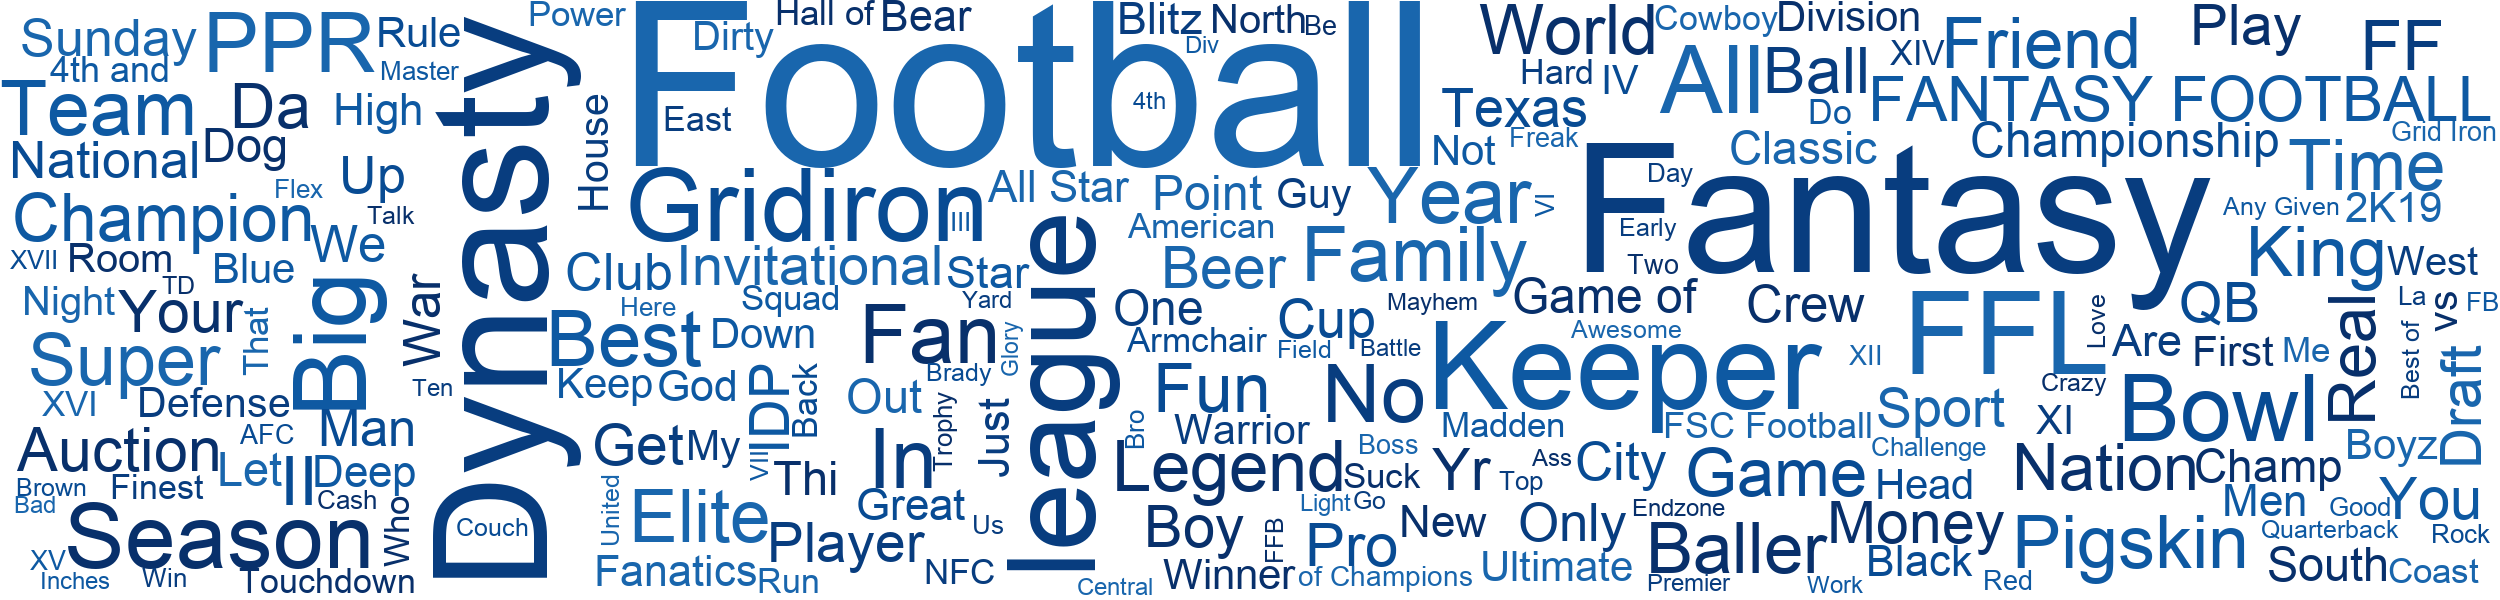

In [5]:
#### Remove some of the generic of overly abundent words that take up too much realestate in the word cloud
remove_list = ['League', 'the', 'THE', 'the ', 'THE ', 'The',
               '2019', 'LEAGUE', 'NFL', 'Fantasy Football', '2018', 'It']
for word in remove_list:
    text_cloud = text_cloud.replace(word, "")

#### Light colors are hard to see on a white background, so let's grab 
####     the top 5 darkest colors from the "Blues" Matplotlib colormap
cmap = matplotlib.cm.Blues(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[15:,:-1])

#### Create the wordcloud
#### Each generation will create a uniquely formatted/shaped wordcloud
WordCloud(width=2500, # Optimal size for Medium article
          height=600, 
          margin=0, 
          colormap=cmap,
          background_color='white',
          font_path='/Library/Fonts/Arial.ttf'
          #include_numbers=True,

         ).generate_from_text(text_cloud).to_image()